# El problema del bollo de castaña
[Problema] El día en que los bollos de castaña cubren el sistema solar
Si espolvorea un solo bollo de castaña con vid, ¿cuánto tiempo estará cubierto el sistema solar con bollo de castaña? Crea un programa para calcular esto.

Calcule después de asumir el volumen de bollos de castaña y el sistema solar. Puede simplificar el problema al no considerar la brecha entre los bollos de castaño y la gravedad.

Cree un programa de propósito general que pueda aplicarse a otras situaciones, como cuando el Tokyo Dome se llena cuando rocía un Byvine en la pelota. Además, haga que la computadora portátil sea fácil de entender, como mostrar gráficos.

Tiempo necesario: 715 minutos ≈ 11.9 horas


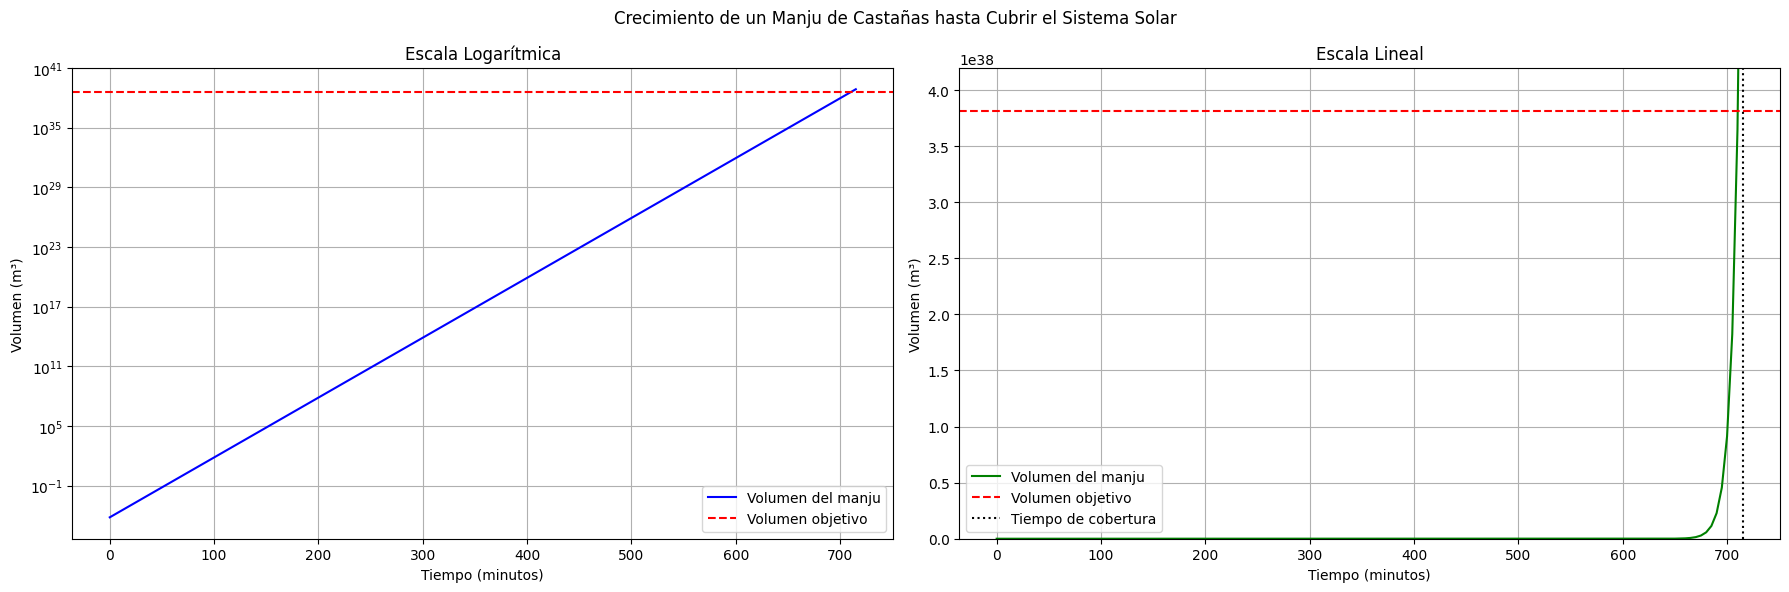

In [2]:
# PASO 1: Importar las bibliotecas necesarias
import math
import matplotlib.pyplot as plt

# PASO 2: Crear función para calcular el tiempo requerido
def calcular_tiempo(volumen_inicial, volumen_objetivo, tiempo_duplicacion):
    """
    Calcula cuánto tiempo se necesita para que un volumen inicial
    alcance un volumen objetivo, duplicándose cada cierto tiempo.
    """
    if volumen_inicial >= volumen_objetivo:
        return 0  # Si ya es más grande, no necesita tiempo
    
    # Fórmula matemática: Número de duplicaciones necesarias
    relacion = volumen_objetivo / volumen_inicial
    duplicaciones = math.log(relacion, 2)  # Logaritmo base 2
    duplicaciones_redondeado = math.ceil(duplicaciones)  # Redondear hacia arriba
    
    return duplicaciones_redondeado * tiempo_duplicacion

# PASO 3: Función para crear los gráficos
def crear_graficos(tiempos, volumenes, volumen_objetivo, tiempo_total):
    """
    Crea dos gráficos para visualizar el crecimiento:
    - Uno en escala logarítmica (muestra todo el rango)
    - Uno en escala lineal (muestra el crecimiento explosivo final)
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Dos gráficos lado a lado
    
    # Gráfico 1: Escala logarítmica
    ax1.plot(tiempos, volumenes, 'b-', label='Volumen del manju')
    ax1.axhline(volumen_objetivo, color='r', linestyle='--', label='Volumen objetivo')
    ax1.set_yscale('log')  # Eje Y en escala logarítmica
    ax1.set_title("Escala Logarítmica")
    ax1.set_xlabel("Tiempo (minutos)")
    ax1.set_ylabel("Volumen (m³)")
    ax1.legend()
    ax1.grid(True)
    
    # Gráfico 2: Escala lineal
    ax2.plot(tiempos, volumenes, 'g-', label='Volumen del manju')
    ax2.axhline(volumen_objetivo, color='r', linestyle='--', label='Volumen objetivo')
    ax2.axvline(tiempo_total, color='k', linestyle=':', label='Tiempo de cobertura')
    ax2.set_title("Escala Lineal")
    ax2.set_xlabel("Tiempo (minutos)")
    ax2.set_ylabel("Volumen (m³)")
    ax2.legend()
    ax2.grid(True)
    ax2.set_ylim(0, volumen_objetivo * 1.1)  # Límite para ver el cruce
    
    plt.suptitle("Crecimiento de un Manju de Castañas hasta Cubrir el Sistema Solar")
    plt.tight_layout()
    plt.show()

# PASO 4: Bloque principal del programa
if __name__ == "__main__":
    # A. Configuración inicial
    diametro_manju = 0.05  # 5 cm convertidos a metros
    radio_manju = diametro_manju / 2
    volumen_inicial = (4/3) * math.pi * (radio_manju ** 3)  # Fórmula volumen esfera
    
    radio_sistema_solar = 4.5e12  # 4.5 billones de kilómetros en metros
    volumen_objetivo = (4/3) * math.pi * (radio_sistema_solar ** 3)
    
    tiempo_duplicacion = 5  # minutos
    
    # B. Calcular tiempo total requerido
    tiempo_total = calcular_tiempo(volumen_inicial, volumen_objetivo, tiempo_duplicacion)
    print(f"Tiempo necesario: {tiempo_total} minutos ≈ {tiempo_total/60:.1f} horas")
    
    # C. Generar datos para los gráficos
    tiempos = []
    volumenes = []
    volumen_actual = volumen_inicial
    tiempo_actual = 0
    
    while volumen_actual < volumen_objetivo:
        tiempos.append(tiempo_actual)
        volumenes.append(volumen_actual)
        volumen_actual *= 2  # Duplicar el volumen
        tiempo_actual += tiempo_duplicacion  # Sumar 5 minutos
    
    # Agregar el último punto que supera el objetivo
    tiempos.append(tiempo_actual)
    volumenes.append(volumen_actual)
    
    # D. Crear y mostrar los gráficos
    crear_graficos(tiempos, volumenes, volumen_objetivo, tiempo_total)

Baseball -> Tokyo Dome:
- Tiempo requerido: 165 min (2.8 horas)
- Duplicaciones necesarias: 33
- Volumen final: 1.54e+06 m³



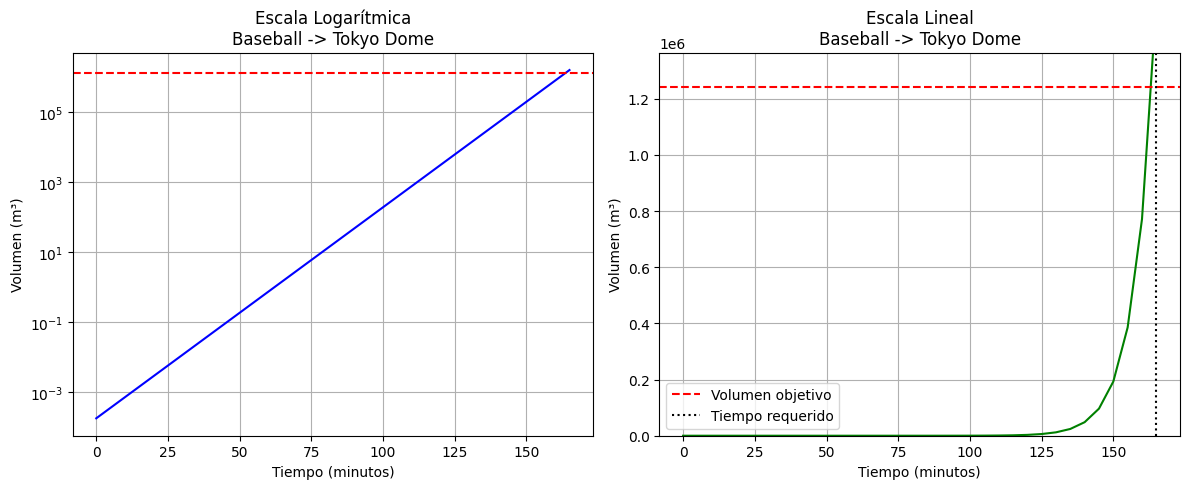

Manju -> Sistema Solar:
- Tiempo requerido: 715 min (11.9 horas)
- Duplicaciones necesarias: 143
- Volumen final: 7.30e+38 m³



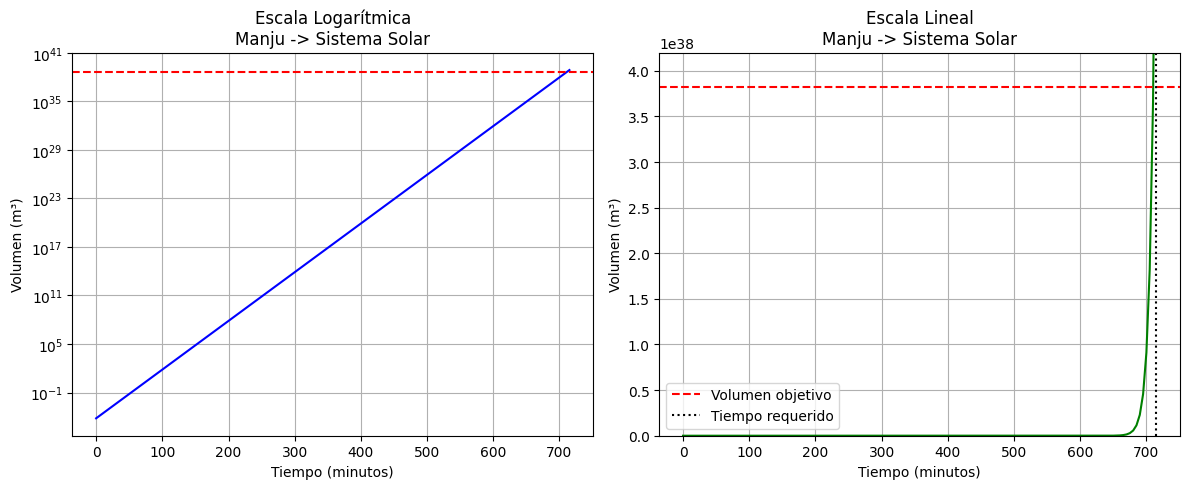

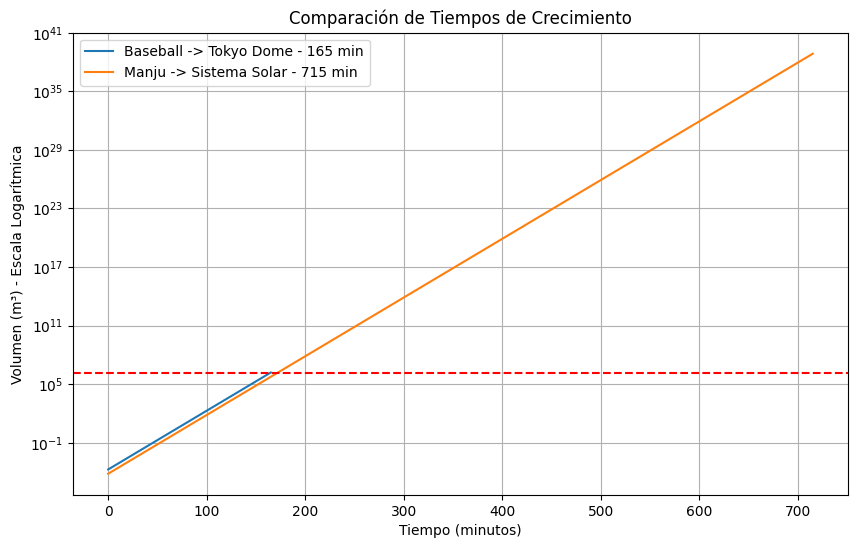

In [3]:
# PASO 1: Importar bibliotecas necesarias
import math
import matplotlib.pyplot as plt

# PASO 2: Crear clase para manejar diferentes escenarios
class SimuladorCrecimiento:
    def __init__(self, nombre, volumen_inicial, volumen_objetivo, tiempo_duplicacion):
        self.nombre = nombre
        self.vol_inicial = volumen_inicial
        self.vol_objetivo = volumen_objetivo
        self.t_duplicacion = tiempo_duplicacion
        self.tiempos = []
        self.volumenes = []
    
    def calcular_tiempo(self):
        """Calcula el tiempo necesario para alcanzar el volumen objetivo"""
        if self.vol_inicial >= self.vol_objetivo:
            return 0
        
        relacion = self.vol_objetivo / self.vol_inicial
        duplicaciones = math.ceil(math.log(relacion, 2))
        return duplicaciones * self.t_duplicacion
    
    def generar_datos(self):
        """Genera la progresión de volúmenes a través del tiempo"""
        self.tiempos = []
        self.volumenes = []
        vol_actual = self.vol_inicial
        tiempo_actual = 0
        
        while vol_actual < self.vol_objetivo:
            self.tiempos.append(tiempo_actual)
            self.volumenes.append(vol_actual)
            vol_actual *= 2
            tiempo_actual += self.t_duplicacion
        
        # Agregar último punto que supera el objetivo
        self.tiempos.append(tiempo_actual)
        self.volumenes.append(vol_actual)
    
    def graficar(self):
        """Crea gráficos duales para el escenario"""
        plt.figure(figsize=(12, 5))
        
        # Gráfico logarítmico
        plt.subplot(1, 2, 1)
        plt.plot(self.tiempos, self.volumenes, 'b-')
        plt.axhline(self.vol_objetivo, color='r', linestyle='--')
        plt.yscale('log')
        plt.title(f'Escala Logarítmica\n{self.nombre}')
        plt.xlabel('Tiempo (minutos)')
        plt.ylabel('Volumen (m³)')
        plt.grid(True)
        
        # Gráfico lineal
        plt.subplot(1, 2, 2)
        plt.plot(self.tiempos, self.volumenes, 'g-')
        plt.axhline(self.vol_objetivo, color='r', linestyle='--', label='Volumen objetivo')
        plt.axvline(self.calcular_tiempo(), color='k', linestyle=':', label='Tiempo requerido')
        plt.title(f'Escala Lineal\n{self.nombre}')
        plt.xlabel('Tiempo (minutos)')
        plt.ylabel('Volumen (m³)')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, self.vol_objetivo * 1.1)
        
        plt.tight_layout()
        plt.show()

# PASO 3: Función para comparar múltiples escenarios
def comparar_escenarios(escenarios):
    """Crea gráfico comparativo de múltiples escenarios"""
    plt.figure(figsize=(10, 6))
    
    for escenario in escenarios:
        escenario.generar_datos()
        plt.plot(escenario.tiempos, escenario.volumenes, 
                label=f'{escenario.nombre} - {escenario.calcular_tiempo()} min')
    
    plt.axhline(escenarios[0].vol_objetivo, color='r', linestyle='--')
    plt.title('Comparación de Tiempos de Crecimiento')
    plt.xlabel('Tiempo (minutos)')
    plt.ylabel('Volumen (m³) - Escala Logarítmica')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

# PASO 4: Configuración y ejecución principal
if __name__ == "__main__":
    # Datos de referencia:
    VOLUMEN_TOKYO_DOME = 1_240_000  # m³ (capacidad oficial)
    VOLUMEN_SISTEMA_SOLAR = (4/3) * math.pi * (4.5e12)**3  # m³
    
    # Crear escenarios
    escenario_baseball = SimuladorCrecimiento(
        nombre="Baseball -> Tokyo Dome",
        volumen_inicial=(4/3) * math.pi * (0.07/2)**3,  # Pelota de 7cm diámetro
        volumen_objetivo=VOLUMEN_TOKYO_DOME,
        tiempo_duplicacion=5
    )
    
    escenario_sistema_solar = SimuladorCrecimiento(
        nombre="Manju -> Sistema Solar",
        volumen_inicial=(4/3) * math.pi * (0.05/2)**3,  # Manju de 5cm diámetro
        volumen_objetivo=VOLUMEN_SISTEMA_SOLAR,
        tiempo_duplicacion=5
    )
    
    # Calcular y mostrar resultados
    for escenario in [escenario_baseball, escenario_sistema_solar]:
        escenario.generar_datos()
        tiempo = escenario.calcular_tiempo()
        print(f"{escenario.nombre}:")
        print(f"- Tiempo requerido: {tiempo} min ({tiempo/60:.1f} horas)")
        print(f"- Duplicaciones necesarias: {len(escenario.tiempos)-1}")
        print(f"- Volumen final: {escenario.volumenes[-1]:.2e} m³\n")
        escenario.graficar()
    
    # Comparación conjunta
    comparar_escenarios([escenario_baseball, escenario_sistema_solar])